In [236]:
import pdfplumber
from nltk import tokenize
import pandas as pd
import os
from tika import parser
import re
from nltk import sent_tokenize, word_tokenize
import nltk

In [56]:
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO

def  convert_pdf_to_txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos = set()
    
    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password, caching = caching, check_extractable=True):
        interpreter.process_page(page)
    text = retstr.getvalue()
        
    fp.close()
    device.close()
    retstr.close()
    return text

In [3]:
v = convert_pdf_to_txt()
print(v)

2021학년도 대학수학능력시험 문제지

제 3 교시

1

짝수형

  1번부터  17번까지는  듣고  답하는  문제입니다.  1번부터 

15번까지는  한  번만  들려주고,  16번부터  17번까지는  두  번 

들려줍니다. 방송을 잘 듣고 답을 하시기 바랍니다.

1. 다음을  듣고,  남자가  하는  말의  목적으로  가장  적절한  것을 

고르시오.

① 운동 방법에 관한 동영상 채널을 홍보하려고

② 체육관 보수 공사 일정 변경을 공지하려고
③ 스포츠 중계방송 중단을 예고하려고

④ 동영상 업로드 방법을 설명하려고

⑤ 헬스클럽 할인 행사를 안내하려고

2. 대화를 듣고,  여자의 의견으로 가장 적절한 것을 고르시오.

① 별 관찰은 아이들이 수학 개념에 친숙해지도록 도와준다.

② 아이들은 별 관찰을 통해 예술적 영감을 얻는다.

③ 야외 활동이 아이들의 신체 발달에 필수적이다.
④ 아이들은 자연을 경험함으로써 인격적으로 성장한다.

⑤ 수학 문제 풀이는 아이들의 논리적 사고력을 증진시킨다.

7. 대화를 듣고,  남자가 텐트를 반품하려는 이유를 고르시오.

① 운반하기 무거워서

② 캠핑이 취소되어서

③ 크기가 작아서
④ 설치 방법이 어려워서

⑤ 더 저렴한 제품을 찾아서

8. 대화를  듣고,  Bradford Museum of Failure에  관해  언급되지 

않은  것을 고르시오.

① 전시품 
④ 입장료

② 설립 목적
⑤ 위치

③ 개관 연도

9. National Baking Competition에 관한 다음 내용을 듣고,  일치하지 

않는  것을 고르시오.

① 해마다 열리는 행사이다.

② 올해의 주제는 건강한 디저트이다.
③ 20명이 결선에 진출할 것이다.
④ 수상자들의 조리법이 잡지에 실릴 것이다.

⑤ 웹 사이트에서 생중계될 것이다.

3. 대화를 듣고,  두 사람의 관계를 가장 잘 나타낸 것을 고르시오.

10. 다음  표를  보면서  대화를  듣고,  여자가  주문할  재사용  빨대 

① 탐험가 － 환경 운동가

In [58]:
print(convert_pdf_to_txt("D:/ENG/2021_영어.pdf"))

2021학년도 대학수학능력시험 문제지

제 3 교시

1

짝수형

  1번부터  17번까지는  듣고  답하는  문제입니다.  1번부터 

15번까지는  한  번만  들려주고,  16번부터  17번까지는  두  번 

들려줍니다. 방송을 잘 듣고 답을 하시기 바랍니다.

1. 다음을  듣고,  남자가  하는  말의  목적으로  가장  적절한  것을 

고르시오.

① 운동 방법에 관한 동영상 채널을 홍보하려고

② 체육관 보수 공사 일정 변경을 공지하려고
③ 스포츠 중계방송 중단을 예고하려고

④ 동영상 업로드 방법을 설명하려고

⑤ 헬스클럽 할인 행사를 안내하려고

2. 대화를 듣고,  여자의 의견으로 가장 적절한 것을 고르시오.

① 별 관찰은 아이들이 수학 개념에 친숙해지도록 도와준다.

② 아이들은 별 관찰을 통해 예술적 영감을 얻는다.

③ 야외 활동이 아이들의 신체 발달에 필수적이다.
④ 아이들은 자연을 경험함으로써 인격적으로 성장한다.

⑤ 수학 문제 풀이는 아이들의 논리적 사고력을 증진시킨다.

7. 대화를 듣고,  남자가 텐트를 반품하려는 이유를 고르시오.

① 운반하기 무거워서

② 캠핑이 취소되어서

③ 크기가 작아서
④ 설치 방법이 어려워서

⑤ 더 저렴한 제품을 찾아서

8. 대화를  듣고,  Bradford Museum of Failure에  관해  언급되지 

않은  것을 고르시오.

① 전시품 
④ 입장료

② 설립 목적
⑤ 위치

③ 개관 연도

9. National Baking Competition에 관한 다음 내용을 듣고,  일치하지 

않는  것을 고르시오.

① 해마다 열리는 행사이다.

② 올해의 주제는 건강한 디저트이다.
③ 20명이 결선에 진출할 것이다.
④ 수상자들의 조리법이 잡지에 실릴 것이다.

⑤ 웹 사이트에서 생중계될 것이다.

3. 대화를 듣고,  두 사람의 관계를 가장 잘 나타낸 것을 고르시오.

10. 다음  표를  보면서  대화를  듣고,  여자가  주문할  재사용  빨대 

① 탐험가 － 환경 운동가

In [85]:
path = "D:/ENG/"
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.pdf')]
df = pd.DataFrame()
j = 0

for i in file_list_py:
    raw = parser.from_file(path+i)
    
    v = convert_pdf_to_txt(path+i)
    
    cleansed = re.sub('[^A-Za-z0-9,.?!;\'\"\’-]+',' ', v) # 정규표현식 기준을 추가함.
    result = tokenize.sent_tokenize(cleansed)
    raw_split = pd.DataFrame({'raw_data':result})
    
    raw_split['year'] = 2021+j
    j += 1
    
    df = pd.concat([df,raw_split])

In [86]:
df

,raw_data,year
0,2021 3 1 1 17 .,2021
1,"1 15 , 16 17 . . 1. , .",2021
2,"2. , . . . . . . 7. , .",2021
3,"8. , Bradford Museum of Failure .",2021
4,9.,2021
...,...,...
661,Hailey answered with a wink.,2023
662,45. ?,2023
663,Hailey . . Hailey .,2023
664,Hailey Camila .,2023


In [87]:
df['raw_data'][0]

0    2021 3 1 1 17 .
0    2022 3 1 1 17 .
0    2023 3 1 1 17 .
Name: raw_data, dtype: object

In [66]:
df[df['Checker'] == 1]

,raw_data,Checker,year
5,"National Baking Competition , .",1,2021
11,Reusable Straw Sets 3 pieces Set Material A B ...,1,2021
13,I don’t feel like going out today.,1,2021
15,You must get to the airport quickly.,1,2021
16,I didn’t know you wanted to go sightseeing.,1,2021
...,...,...,...
657,Dad will be here shortly.,1,2023
659,Camila asked out of interest.,1,2023
661,Hailey answered with a wink.,1,2023
663,Hailey . . Hailey .,1,2023


In [88]:
## 영어문장 작업결과 입력 테이블 생성

import psycopg2
import pandas as pd

connection = psycopg2.connect(host="localhost", dbname="postgres", user="postgres", password="0328", port=5432)

cur = connection.cursor()

sql_string = "CREATE TABLE IF NOT EXISTS KSAT_Sent (sid SERIAL, raw_data VARCHAR(65535), year VARCHAR(5))"

cur.execute(sql_string)

cur.execute("commit")


In [90]:
for i in range(len(df)): #복제할 테이블 길이만큼만 반복

    # df 각 row에서 value 추출 및 변수에 할당
    raw_data = df['raw_data'].iloc[i]
    year = df['year'].iloc[i]

    sql_string = "INSERT INTO KSAT_Sent (raw_data, year) VALUES ('{}', '{}')".format(raw_data, year)

    cur.execute(sql_string)

cur.execute("commit")

In [157]:
cur.execute("select * from KSAT_Sent")
rows = cur.fetchall()

df = pd.DataFrame(rows)
df.columns=['sid','raw_data', 'year']

In [158]:
df

,sid,raw_data,year
0,1,2021 3 1 1 17 .,2021
1,2,"1 15 , 16 17 . . 1. , .",2021
2,3,"2. , . . . . . . 7. , .",2021
3,4,"8. , Bradford Museum of Failure .",2021
4,5,9.,2021
...,...,...,...
1327,1328,Hailey answered with a wink.,2023
1328,1329,45. ?,2023
1329,1330,Hailey . . Hailey .,2023
1330,1331,Hailey Camila .,2023


In [159]:
df['word_cnt'] = df['raw_data'].apply(lambda x: len(x.split()))

In [160]:
df

,sid,raw_data,year,word_cnt
0,1,2021 3 1 1 17 .,2021,6
1,2,"1 15 , 16 17 . . 1. , .",2021,10
2,3,"2. , . . . . . . 7. , .",2021,11
3,4,"8. , Bradford Museum of Failure .",2021,7
4,5,9.,2021,1
...,...,...,...,...
1327,1328,Hailey answered with a wink.,2023,5
1328,1329,45. ?,2023,2
1329,1330,Hailey . . Hailey .,2023,5
1330,1331,Hailey Camila .,2023,3


In [161]:
df.groupby('year').size()

year
2021    344
2022    322
2023    666
dtype: int64

In [162]:
df[df['word_cnt'] <= 3]

,sid,raw_data,year,word_cnt
4,5,9.,2021,1
8,9,"5. , .",2021,3
9,10,"6. , .",2021,3
17,18,"12. , .",2021,3
18,19,It’s all right.,2021,3
...,...,...,...,...
1299,1300,We love you!,2023,3
1314,1315,43.,2023,1
1315,1316,A ?,2023,2
1328,1329,45. ?,2023,2


In [163]:
df[df['word_cnt'] <= 3][50:100]

,sid,raw_data,year,word_cnt
362,362,No way.,2022,2
364,364,I see.,2022,2
366,366,Never mind.,2022,2
368,368,Good.,2022,1
370,370,Excellent.,2022,1
372,372,1 8 .,2022,3
374,374,3 Man Fantastic.,2022,3
377,377,Great.,2022,1
380,380,No worries.,2022,2
382,382,"14. , .",2022,3


In [164]:
df1 = df[df['word_cnt'] >= 4] # 첫번째 기준 문장이 4개 어절 이상일 것

In [182]:
df1

,sid,raw_data,year,word_cnt,checker1
0,1,2021 3 1 1 17 .,2021,6,0
1,2,"1 15 , 16 17 . . 1. , .",2021,10,0
2,3,"2. , . . . . . . 7. , .",2021,11,0
3,4,"8. , Bradford Museum of Failure .",2021,7,0
5,6,"National Baking Competition , .",2021,5,1
...,...,...,...,...,...
1325,1326,Camila asked out of interest.,2023,5,1
1326,1327,Dad will be surprised to find out what it is!,2023,10,1
1327,1328,Hailey answered with a wink.,2023,5,1
1329,1330,Hailey . . Hailey .,2023,5,1


In [166]:
df1.groupby('year').size()

year
2021    301
2022    275
2023    558
dtype: int64

In [170]:
df['raw_data'].apply(lambda x: word_tokenize(x))

0                          [2021, 3, 1, 1, 17, .]
1              [1, 15, ,, 16, 17, ., ., 1., ,, .]
2             [2., ,, ., ., ., ., ., ., 7., ,, .]
3       [8., ,, Bradford, Museum, of, Failure, .]
4                                          [9, .]
                          ...                    
1327         [Hailey, answered, with, a, wink, .]
1328                                     [45., ?]
1329                    [Hailey, ., ., Hailey, .]
1330                          [Hailey, Camila, .]
1331                              [., ., 8, 8, .]
Name: raw_data, Length: 1332, dtype: object

In [171]:
df2 = df.copy()

In [172]:
df2['word_cnt'] = df2['raw_data'].apply(lambda x: len(x.split()))

In [173]:
df2['word_cnt'] = df2['raw_data'].apply(lambda x: len(word_tokenize(x)))

In [174]:
df2[df2['word_cnt'] == 4]

,sid,raw_data,year,word_cnt
30,31,3 Woman Exactly.,2021,4
34,35,"Oh, no.",2021,4
41,42,3 Man Wonderful.,2021,4
57,58,"16 17 , .",2021,4
162,162,Frank Hyneman Knight ?,2021,4
175,175,"5 29. , ?",2021,4
176,176,3 31 34 .,2021,4
238,238,subservient 36 37 .,2021,4
261,260,3 7 39.,2021,4
304,303,parable trajectory 41. ?,2021,4


In [177]:
df2['word_cnt'][62]

8

In [181]:
df2['word_cnt'][709]

7

In [179]:
df2['raw_data'][709]

'I don’t think so.'

In [176]:
df[df['word_cnt'] == 4] # 두번째 기준, split과 word_tokenize를 비교하였을 때 온점이 띄어쓰기로 변경 되는 현상이 있음

,sid,raw_data,year,word_cnt
57,58,"16 17 , .",2021,4
62,63,"Dear Friends, Season’s greetings.",2021,4
82,83,He was absolutely right.,2021,4
85,86,I breathed out slowly.,2021,4
143,144,Helmets are not provided.,2021,4
147,148,Jason’s Photography Class ?,2021,4
162,162,Frank Hyneman Knight ?,2021,4
175,175,"5 29. , ?",2021,4
176,176,3 31 34 .,2021,4
186,186,consent anatomy physiology 31.,2021,4


In [183]:
df1

,sid,raw_data,year,word_cnt,checker1
0,1,2021 3 1 1 17 .,2021,6,0
1,2,"1 15 , 16 17 . . 1. , .",2021,10,0
2,3,"2. , . . . . . . 7. , .",2021,11,0
3,4,"8. , Bradford Museum of Failure .",2021,7,0
5,6,"National Baking Competition , .",2021,5,1
...,...,...,...,...,...
1325,1326,Camila asked out of interest.,2023,5,1
1326,1327,Dad will be surprised to find out what it is!,2023,10,1
1327,1328,Hailey answered with a wink.,2023,5,1
1329,1330,Hailey . . Hailey .,2023,5,1


In [204]:
def sent_Checker2(x):
    sum = 0
    for i in x:
        if i == '.':
            sum += 1
    return sum

In [206]:
df1['point_num'] = df1['raw_data'].apply(lambda x: sent_Checker2(x))

C:\Users\user\AppData\Local\Temp\ipykernel_21792\697162711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['point_num'] = df1['raw_data'].apply(lambda x: sent_Checker2(x))


In [215]:
df1[df1['point_num'] >= 3]

,sid,raw_data,year,word_cnt,checker1,point_num
1,2,"1 15 , 16 17 . . 1. , .",2021,10,0,4
2,3,"2. , . . . . . . 7. , .",2021,11,0,9
6,7,". . 20 . . . 3. , .",2021,9,0,7
7,8,"10. , 4. , .",2021,5,0,3
11,12,Reusable Straw Sets 3 pieces Set Material A B ...,2021,36,1,7
29,30,"2 13. , 18. ? .",2021,6,0,3
95,96,It’s clear that we should concentrate our own ...,2021,42,1,7
134,135,. . . . Touch and Movement Two Major Elements ...,2021,53,0,5
145,146,Complete the return by pressing the OK button ...,2021,14,1,3
146,147,QR . . OK . 28.,2021,6,1,4


In [223]:
df1['raw_data'][158]

'In 2019, the U.S. had the second largest online share of retail sales with 16.5 .'

In [220]:
df2 = df1[df1['point_num'] <= 2] # 두번째 기준, 점이 두개 이하로 찍혀있는 것

In [221]:
df2

,sid,raw_data,year,word_cnt,checker1,point_num
0,1,2021 3 1 1 17 .,2021,6,0,1
3,4,"8. , Bradford Museum of Failure .",2021,7,0,2
5,6,"National Baking Competition , .",2021,5,1,1
10,11,180 190 200 210 230 .,2021,6,0,1
12,13,How about going to the cafe over there?,2021,8,1,0
...,...,...,...,...,...,...
1323,1324,Dad will be here shortly.,2023,5,1,1
1324,1325,What gift did a you buy for his birthday?,2023,9,1,0
1325,1326,Camila asked out of interest.,2023,5,1,1
1326,1327,Dad will be surprised to find out what it is!,2023,10,1,0


In [224]:
def sent_Checker(text):

    pattern1 = '^[A-Za-z]' 

    if re.search(pattern1,  text):
        return True

    else:
        return False

In [226]:
df2['checker1'] = df2['raw_data'].apply(lambda x: 1 if sent_Checker(x) else 0)

C:\Users\user\AppData\Local\Temp\ipykernel_21792\3722245609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['checker1'] = df2['raw_data'].apply(lambda x: 1 if sent_Checker(x) else 0)


In [233]:
df3 = df2[df2['checker1'] == 1]

In [231]:
df['raw_data'][909]

'7 The most commonly known form of results-based pricing is a practice called contingency pricing, used by lawyers.'

In [234]:
df3 # 문장 시작이 영어로 시작하는 것만 기준으로 처리함

,sid,raw_data,year,word_cnt,checker1,point_num
5,6,"National Baking Competition , .",2021,5,1,1
12,13,How about going to the cafe over there?,2021,8,1,0
13,14,I don’t feel like going out today.,2021,7,1,1
14,15,Why didn’t you wear more comfortable shoes?,2021,7,1,0
15,16,You must get to the airport quickly.,2021,7,1,1
...,...,...,...,...,...,...
1323,1324,Dad will be here shortly.,2023,5,1,1
1324,1325,What gift did a you buy for his birthday?,2023,9,1,0
1325,1326,Camila asked out of interest.,2023,5,1,1
1326,1327,Dad will be surprised to find out what it is!,2023,10,1,0


In [237]:
df3['pos_tags'] = df3['raw_data'].apply(lambda x: nltk.pos_tag(tokenize.word_tokenize(x)))

C:\Users\user\AppData\Local\Temp\ipykernel_21792\3053132140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['pos_tags'] = df3['raw_data'].apply(lambda x: nltk.pos_tag(tokenize.word_tokenize(x)))


In [242]:
def extract_pos_tags(tag_list):

    for i in range(len(tag_list)):

        # 현재 튜플의 품사값이 'TO'인지 확인
        # 원문의 값이 아닌 품사 태그의 TO를 뜻함. 인덱스 확인.
        # 튜플[0]=원문의 스트링값, 튜플[1]=품사태그
        if tag_list[i][1] == 'TO':

            #마지막 튜플이 아니라면, 그 다음 튜플의 품사값이 동사인지 확인
            if i!=(len(tag_list)-1):
                if tag_list[i+1][1] == 'VB' or tag_list[i+1][1] == 'VBP' or tag_list[i+1][1] == 'VBD' or tag_list[i+1][1] == 'VBG' or tag_list[i+1][1] == 'VBN' or tag_list[i+1][1] == 'VBZ':

                    return(True)
        
        else:
            continue

    return(False)

In [243]:
df3['to_vb'] = df3['pos_tags'].apply(lambda x: extract_pos_tags(x))

C:\Users\user\AppData\Local\Temp\ipykernel_21792\346863219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['to_vb'] = df3['pos_tags'].apply(lambda x: extract_pos_tags(x))


In [244]:
df3[df3['to_vb'] == False]

,sid,raw_data,year,word_cnt,checker1,point_num,pos_tags,to_vb
5,6,"National Baking Competition , .",2021,5,1,1,"[(National, NNP), (Baking, NNP), (Competition,...",False
12,13,How about going to the cafe over there?,2021,8,1,0,"[(How, WRB), (about, RB), (going, VBG), (to, T...",False
13,14,I don’t feel like going out today.,2021,7,1,1,"[(I, PRP), (don, VBP), (’, JJ), (t, NN), (feel...",False
14,15,Why didn’t you wear more comfortable shoes?,2021,7,1,0,"[(Why, WRB), (didn, NN), (’, NN), (t, NN), (yo...",False
15,16,You must get to the airport quickly.,2021,7,1,1,"[(You, PRP), (must, MD), (get, VB), (to, TO), ...",False
...,...,...,...,...,...,...,...,...
1322,1323,Camila relaxed only when Hailey had safely pla...,2023,14,1,1,"[(Camila, NNP), (relaxed, VBD), (only, RB), (w...",False
1323,1324,Dad will be here shortly.,2023,5,1,1,"[(Dad, NNP), (will, MD), (be, VB), (here, RB),...",False
1324,1325,What gift did a you buy for his birthday?,2023,9,1,0,"[(What, WP), (gift, NN), (did, VBD), (a, DT), ...",False
1325,1326,Camila asked out of interest.,2023,5,1,1,"[(Camila, NNP), (asked, VBD), (out, IN), (of, ...",False


In [250]:
stopwords = ['i'
,'me'
, 'my'
, 'myself'
, 'we'
, 'our'
, 'ours'
, 'ourselves'
, 'you'
, 'your'
, 'yours'
, 'yourself'
, 'yourselves'
, 'he'
, 'him'
, 'his'
, 'himself'
, 'she'
, 'her'
, 'hers'
, 'herself'
, 'it'
, 'its'
, 'itself'
, 'they'
, 'them'
, 'their'
, 'theirs'
, 'themselves'
, 'what'
, 'which'
, 'who'
, 'whom'
, 'this'
, 'that'
, 'these'
, 'those'
, 'am'
, 'is'
, 'are'
, 'was'
, 'were'
, 'be'
, 'been'
, 'being'
, 'have'
, 'has'
, 'had'
, 'having'
, 'do'
, 'does'
, 'did'
, 'doing'
, 'a'
, 'an'
, 'the'
, 'and'
, 'but'
, 'if'
, 'or'
, 'because'
, 'as'
, 'until'
, 'while'
, 'of'
, 'at'
, 'by'
, 'for'
, 'with'
, 'about'
, 'against'
, 'between'
, 'into'
, 'through'
, 'during'
, 'before'
, 'after'
, 'above'
, 'below'
, 'to'
, 'from'
, 'up'
, 'down'
, 'in'
, 'out'
, 'on'
, 'off'
, 'over'
, 'under'
, 'again'
, 'further'
, 'then'
, 'once'
, 'here'
, 'there'
, 'when'
, 'where'
, 'why'
, 'how'
, 'all'
, 'any'
, 'both'
, 'each'
, 'few'
, 'more'
, 'most'
, 'other'
, 'some'
, 'such'
, 'no'
, 'nor'
, 'not'
, 'only'
, 'own'
, 'same'
, 'so'
, 'than'
, 'too'
, 'very'
, 's'
, 't'
, 'can'
, 'will'
, 'just'
, 'don'
, 'should'
, 'now'
, 'C'
, 'B']

In [251]:
# 2022년 영어문장(Checker=1, 또는 valid_sent DF에서 추출) 값을 하나로 모을 변수
word_string = [] 

sents_2022 = df3[df3['year']=='2022']['raw_data']

# 아래는 index 에러, DF 분리 과정에 index가 잘리기 때문
for sent in sents_2022:
    word_string.append(sent)

word_string

word_string= ' '.join(word_string)

word_string

'Just give me about ten minutes. It took an hour for us to get back home. I think you need to focus on your work. It was nice of you to invite my co-workers. Call me when you finish sending the email. That’s too expensive for the repair. Thanks for taking those pictures of me. I’ll drop off the camera tomorrow. I’ll stop by and get it on my way home. I like the camera you bought for me. Let’s enjoy ourselves at the exhibition with the kids. I think working out too much will burn all your energy. That’ll be a good way to take time for yourself. Don’t forget to bring a charger whenever you go out. Stress is not always as bad as you think. Woman Please check it again. The hotel can’t be fully booked. I should’ve checked out as early as possible. I’m very satisfied with your cleaning service. You can’t switch your room with mine. That’s high enough to avoid the smell. I can get the job done before the deadline. Let’s meet to discuss the changes to the sculpture. I’m sorry that the reopenin

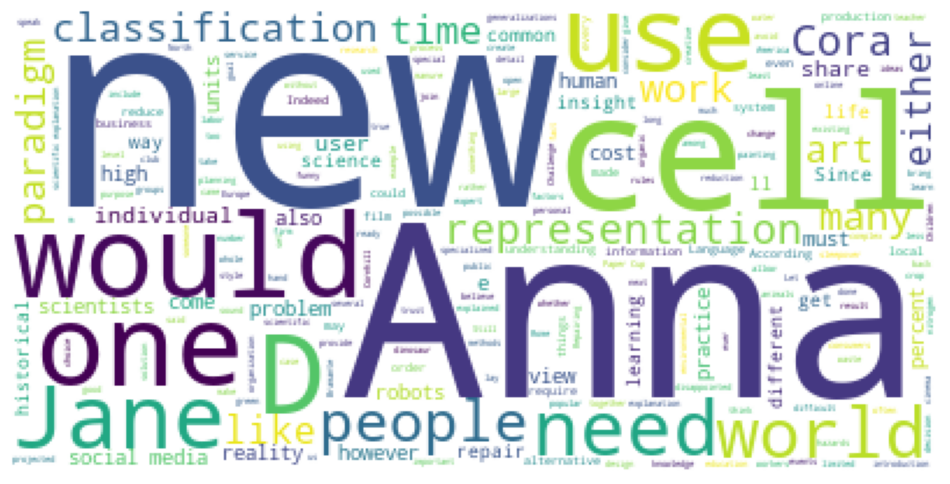

In [252]:
import numpy as np
import pandas as pd

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(stopwords=stopwords, background_color='white', max_words=300).generate(word_string)

plt.figure(figsize=(12,8))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [274]:
def checker_VB(txt):

    tokens = tokenize.word_tokenize(txt)
    tagged = nltk.pos_tag(tokens)
    
    vb_counter = 0
    vb_list = []
    
    for tag in tagged:
        
        if tag[1] == 'VB':
            vb_counter +=1
        if tag[1] == 'VBD':
            vb_counter +=1
            
        if tag[1] == 'VBG':
            vb_counter +=1
            
        if tag[1] == 'VBN':
            vb_counter +=1
            
        if tag[1] == 'VBP':
            vb_counter +=1
            
        if tag[1] == 'VBZ':
            vb_counter +=1
        

    return vb_counter


In [278]:
def checker_VB(txt):

    tokens = tokenize.word_tokenize(txt)
    tagged = nltk.pos_tag(tokens)
    
    vb_counter = 0
    vb_list = []
    
    for tag in tagged:
        
        if tag[1] == 'VB':
            vb_list += [tag[0]]
        if tag[1] == 'VBD':
            vb_list += [tag[0]]
            
        if tag[1] == 'VBG':
            vb_list += [tag[0]]
            
        if tag[1] == 'VBN':
            vb_list += [tag[0]]
            
        if tag[1] == 'VBP':
            vb_list += [tag[0]]
            
        if tag[1] == 'VBZ':
            vb_list += [tag[0]]
        

    return vb_list


In [275]:
df3['check_vb'] = df3['raw_data'].apply(lambda x: checker_VB(x))

C:\Users\user\AppData\Local\Temp\ipykernel_21792\1479227934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['check_vb'] = df3['raw_data'].apply(lambda x: checker_VB(x))


In [279]:
df3['check_vb_list'] = df3['raw_data'].apply(lambda x: checker_VB(x))

C:\Users\user\AppData\Local\Temp\ipykernel_21792\2123627781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['check_vb_list'] = df3['raw_data'].apply(lambda x: checker_VB(x))


In [280]:
df3

,sid,raw_data,year,word_cnt,checker1,point_num,pos_tags,to_vb,check_vb,check_vb_list
5,6,"National Baking Competition , .",2021,5,1,1,"[(National, NNP), (Baking, NNP), (Competition,...",False,0,[]
12,13,How about going to the cafe over there?,2021,8,1,0,"[(How, WRB), (about, RB), (going, VBG), (to, T...",False,1,[going]
13,14,I don’t feel like going out today.,2021,7,1,1,"[(I, PRP), (don, VBP), (’, JJ), (t, NN), (feel...",False,2,"[don, going]"
14,15,Why didn’t you wear more comfortable shoes?,2021,7,1,0,"[(Why, WRB), (didn, NN), (’, NN), (t, NN), (yo...",False,1,[wear]
15,16,You must get to the airport quickly.,2021,7,1,1,"[(You, PRP), (must, MD), (get, VB), (to, TO), ...",False,1,[get]
...,...,...,...,...,...,...,...,...,...,...
1323,1324,Dad will be here shortly.,2023,5,1,1,"[(Dad, NNP), (will, MD), (be, VB), (here, RB),...",False,1,[be]
1324,1325,What gift did a you buy for his birthday?,2023,9,1,0,"[(What, WP), (gift, NN), (did, VBD), (a, DT), ...",False,2,"[did, buy]"
1325,1326,Camila asked out of interest.,2023,5,1,1,"[(Camila, NNP), (asked, VBD), (out, IN), (of, ...",False,1,[asked]
1326,1327,Dad will be surprised to find out what it is!,2023,10,1,0,"[(Dad, NNP), (will, MD), (be, VB), (surprised,...",True,4,"[be, surprised, find, is]"


In [303]:
vb_list = []

for i in range(len(df3)):
    
    
    for j in df3['pos_tags'].iloc[i]:
        
        if j[1] == 'VB':
            vb_list += [j[0]]
            
        if j[1] == 'VBD':
            vb_list += [j[0]]
            
        if j[1] == 'VBG':
            vb_list += [j[0]]
            
        if j[1] == 'VBN':
            vb_list += [j[0]]
            
        if j[1] == 'VBP':
            vb_list += [j[0]]
            
        if j[1] == 'VBZ':
            vb_list += [j[0]]
        

In [304]:
print(vb_list)

['going', 'don', 'going', 'wear', 'get', 'didn', 'know', 'wanted', 'go', '’', 'bring', '’', 'choose', '’', '’', 'pay', 'don', 'want', 'be', 'painted', '’', 'bought', 'Call', 'is', 'repaired', '’', 's', 'don', 'sell', 'be', 'don', 'think', 'wait', 'was', '’', 'been', 'want', 'go', 'congratulate', 'did', 'deserve', 'receive', 'found', 'Tell', 'need', 'help', 'planting', 'Do', 'want', 'picked', 'grow', 'Let', 'take', '’', 're', 'used', 'according', 'related', 'are', 'gained', 's', 'know', 'are', 'starting', 'is', 'participate', 'bring', 'are', 'located', 'drop', 'donated', 'be', 'canned', 'Packaged', 'are', 'distribute', 'appreciate', 'had', 'lost', 'learned', 'had', 'won', 'was', 'was', 'shaking', 'became', 'had', 'run', 'settle', 'Sitting', 'recalled', 'had', 'said', 'is', 'winning', 'winning', 'winning', 'being', 'win', 'is', 'figure', 'are', 'do', 'was', 'had', 'oppose', 'focus', 'breathed', 'were', 'was', 'bored', 'relieved', 'surprised', 'Developing', 'carries', 'become', 'speaking'

In [305]:
nn_list = []

for i in range(len(df3)):
    
    
    for j in df3['pos_tags'].iloc[i]:
        
        if j[1] == 'NN':
            nn_list += [j[0]]
            
        if j[1] == 'NNS':
            nn_list += [j[0]]
            
        if j[1] == 'NNP':
            nn_list += [j[0]]
            
        if j[1] == 'NNPS':
            nn_list += [j[0]]


In [306]:
print(nn_list)

['National', 'Baking', 'Competition', 'cafe', 't', 'feel', 'today', 'didn', '’', 't', 'shoes', 'airport', 't', 'sightseeing', 'car', 'car', 'park', 'parking', 'fee', 't', 'car', 'glad', 'washing', 'machine', 't', 'model', 'option', 't', 'tomorrow', 'ceremony', 'duty', 'citizen', 'award', 'briefcase', 'tomatoes', 'ripe', 'tomatoes', 'yesterday', 'don', '’', 'tomatoes', 'places', 'care', 'tomatoes', 'color', 'change', 'nature', 'seasons', 'colors', 'customs', 'differences', 'color', 'perceptions', 'culture', 'expressions', 'colors', 'expressions', 'meanings', 'yellow', 'green', 'Dear', 'Friends', 'Season', '’', 'greetings', 'campus', 'food', 'drive', 'items', 'donation', 'booths', 'donation', 'booths', 'lobbies', 'campus', 'libraries', 'items', 'hours', 'December', 'food', 'meats', 'fruits', 'goods', 'jam', 'peanut', 'butter', 'food', 'neighbors', 'Christmas', 'Eve', 'help', 'blessings', 'Joanna', 'Campus', 'Food', 'Bank', 'piano', 'contest', 'friend', 'Linda', 'body', 'uneasiness', 'hea

In [308]:
print(' '.join(nn_list))
# print: abc

National Baking Competition cafe t feel today didn ’ t shoes airport t sightseeing car car park parking fee t car glad washing machine t model option t tomorrow ceremony duty citizen award briefcase tomatoes ripe tomatoes yesterday don ’ tomatoes places care tomatoes color change nature seasons colors customs differences color perceptions culture expressions colors expressions meanings yellow green Dear Friends Season ’ greetings campus food drive items donation booths donation booths lobbies campus libraries items hours December food meats fruits goods jam peanut butter food neighbors Christmas Eve help blessings Joanna Campus Food Bank piano contest friend Linda body uneasiness heart beat face concert hall stairs teacher Life others way reason friend improvement hands mind peace calm sorrowful expertise costs experts areas language foods lives domains training effort expertise expertise domain ones ones end experts everything lives ’ t time areas ’ effort proverb Till lions historian

In [310]:
nn_list_n = ' '.join(nn_list)

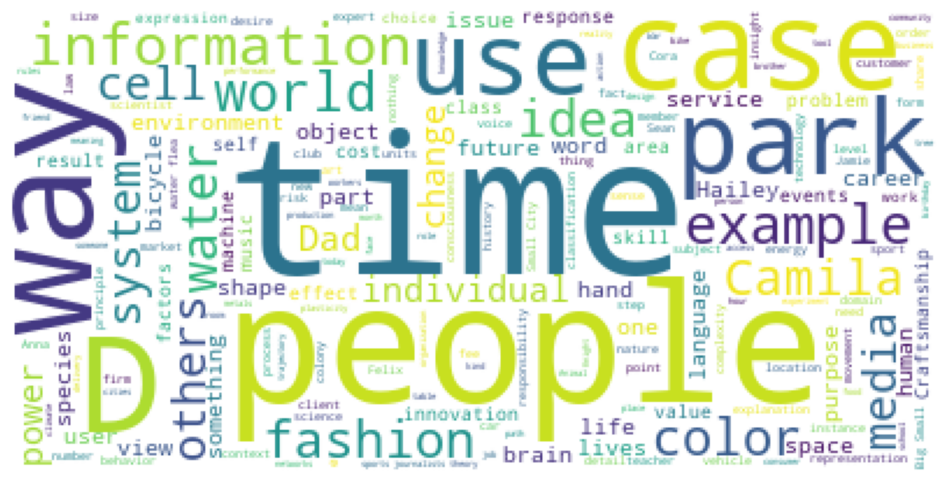

In [311]:
import numpy as np
import pandas as pd

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(stopwords=stopwords, background_color='white', max_words=300).generate(nn_list_n)

plt.figure(figsize=(12,8))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

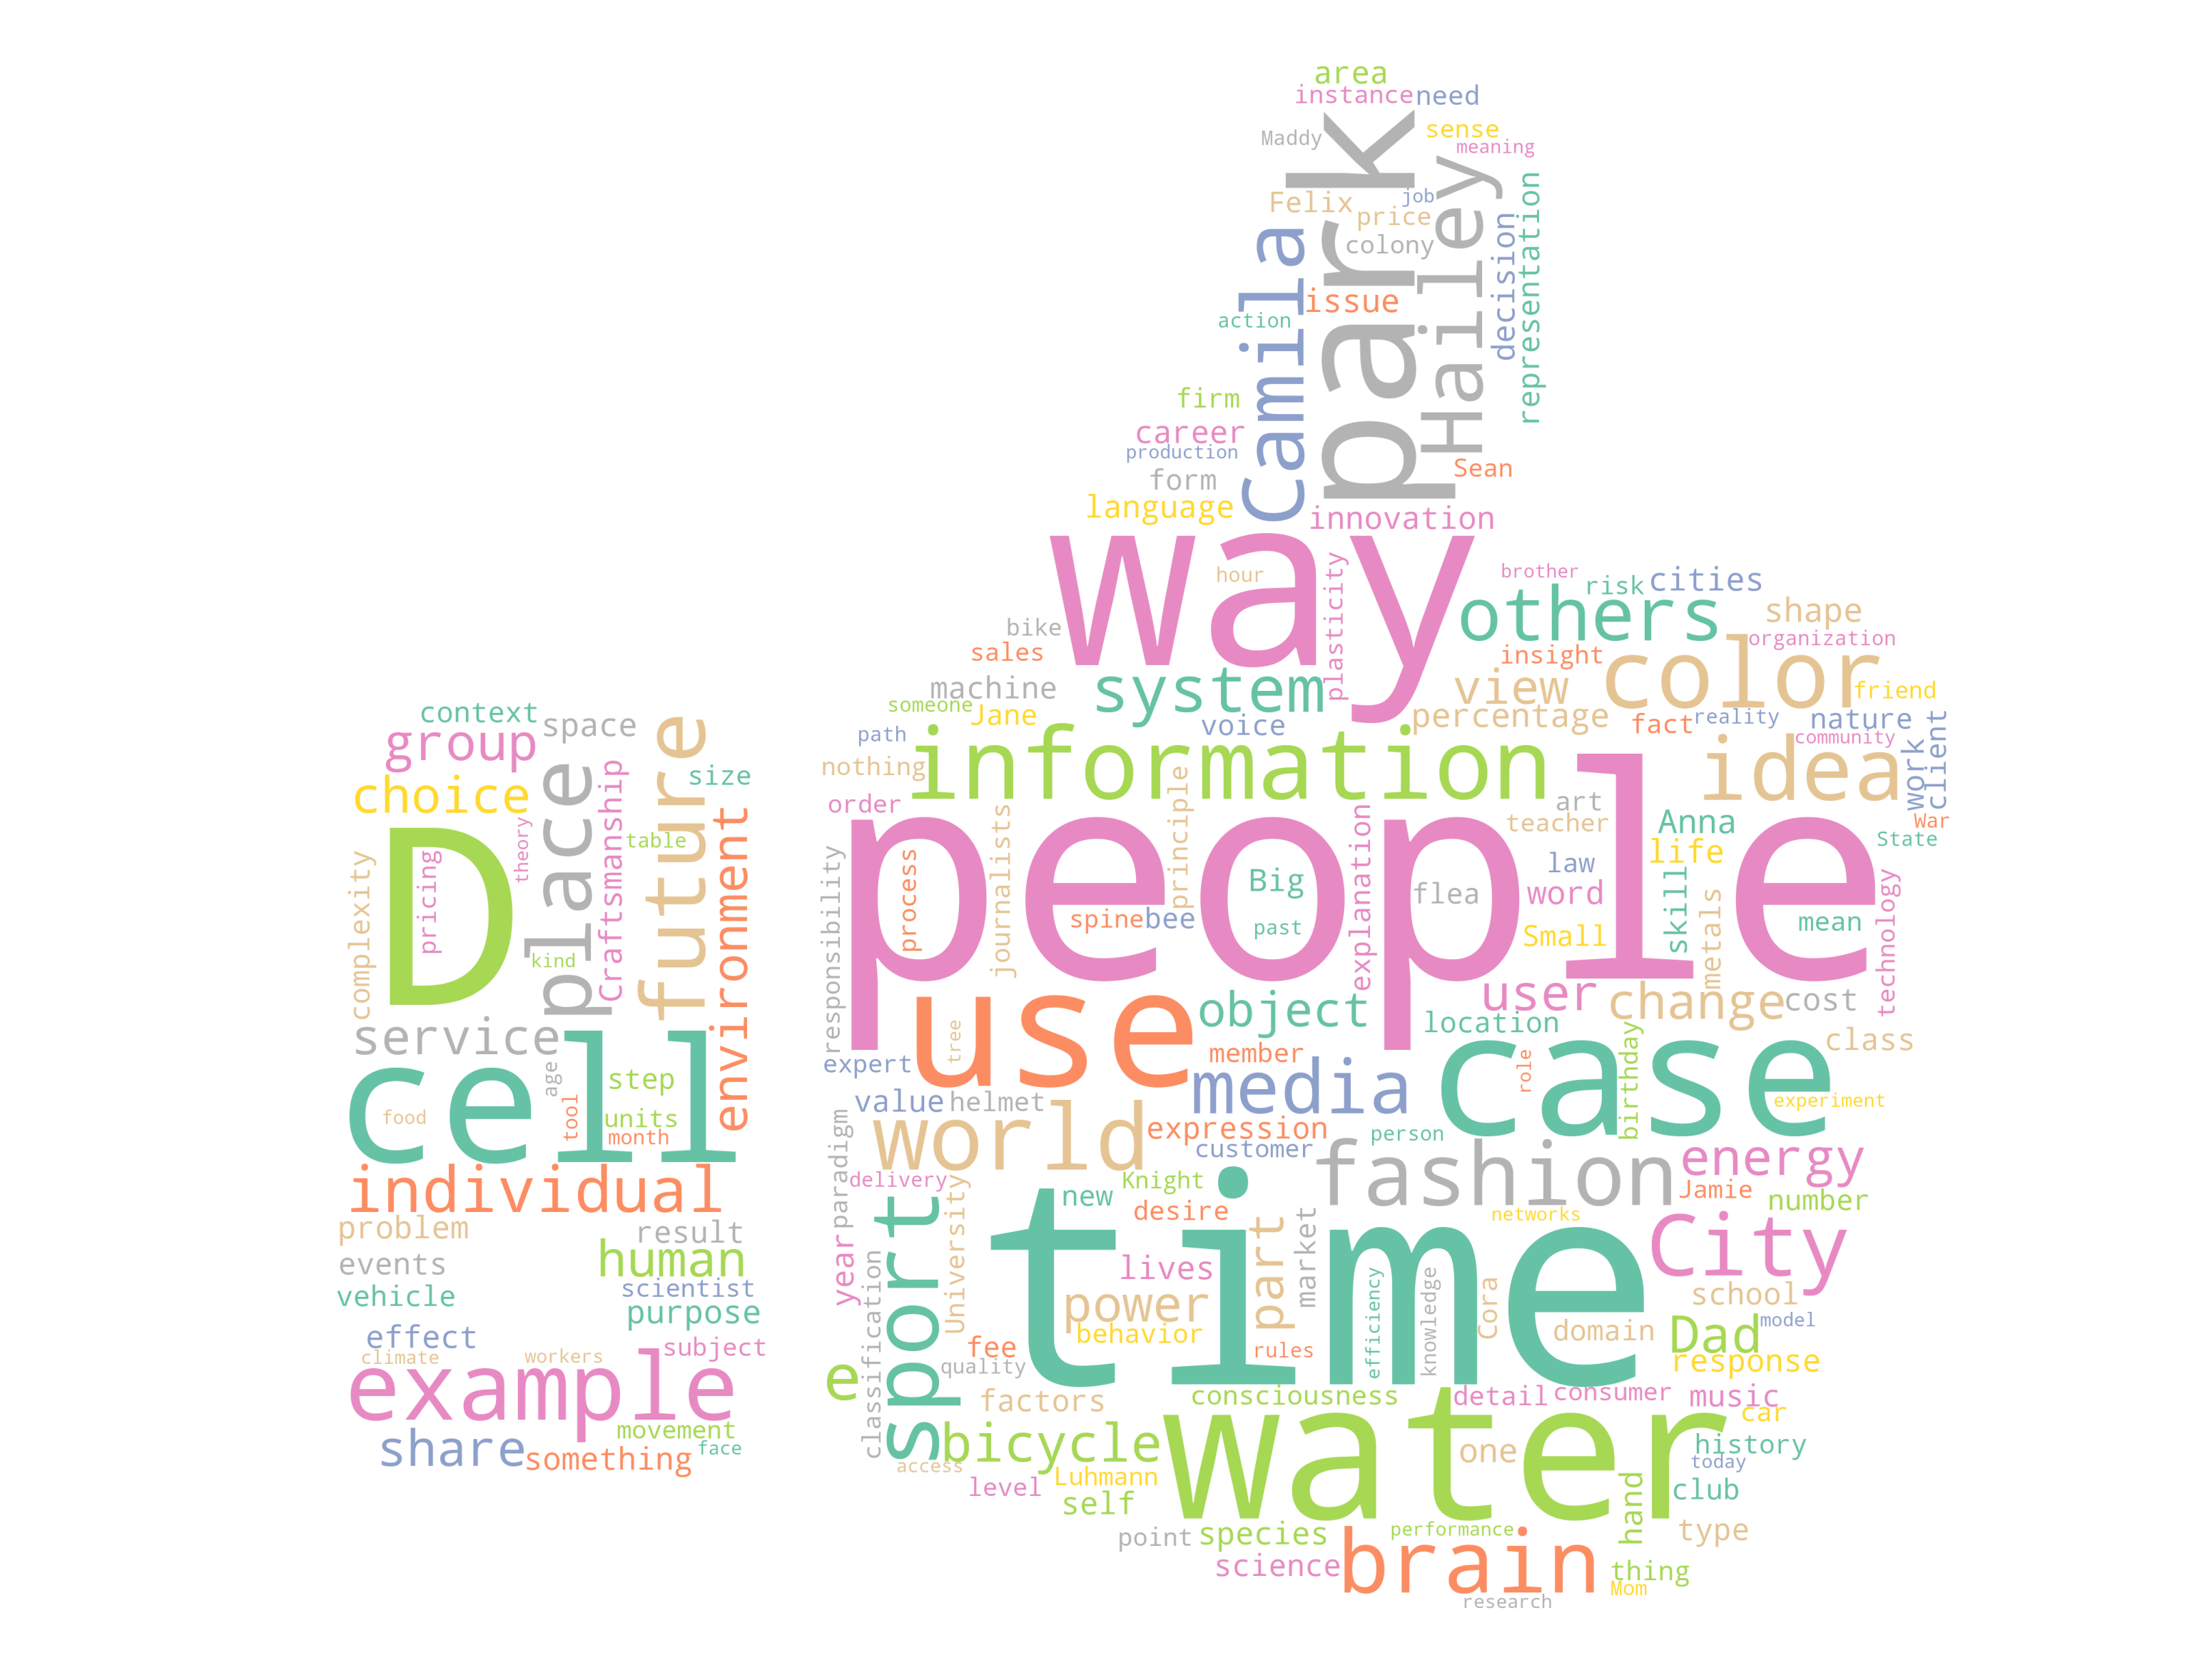

In [314]:
# Import package
import matplotlib.pyplot as plt
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

# Import packages
import numpy as np
from PIL import Image
# Import image to np.array
mask = np.array(Image.open('D:/ENG/upvote.png'))
# Generate wordcloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='Set2', collocations=False, stopwords = stopwords, mask=mask).generate(nn_list_n)
# Plot
plot_cloud(wordcloud)

In [316]:
df3[df3['to_vb'] == True]

,sid,raw_data,year,word_cnt,checker1,point_num,pos_tags,to_vb,check_vb,check_vb_list
16,17,I didn’t know you wanted to go sightseeing.,2021,8,1,1,"[(I, PRP), (didn, VBP), (’, JJ), (t, NN), (kno...",True,4,"[didn, know, wanted, go]"
27,28,I don’t want my car to be painted.,2021,8,1,1,"[(I, PRP), (don, VBP), (’, JJ), (t, NN), (want...",True,4,"[don, want, be, painted]"
44,45,I want to go to congratulate him myself.,2021,8,1,1,"[(I, PRP), (want, VBP), (to, TO), (go, VB), (t...",True,3,"[want, go, congratulate]"
48,49,You deserve to receive the award.,2021,6,1,1,"[(You, PRP), (deserve, VBP), (to, TO), (receiv...",True,2,"[deserve, receive]"
78,79,I had to run out of the concert hall to settle...,2021,12,1,1,"[(I, PRP), (had, VBD), (to, TO), (run, VB), (o...",True,3,"[had, run, settle]"
...,...,...,...,...,...,...,...,...,...,...
1284,1285,Using checklists to ensure that no crucial ste...,2023,28,1,1,"[(Using, VBG), (checklists, NNS), (to, TO), (e...",True,9,"[Using, ensure, are, missed, has, proved, be, ..."
1289,1290,Seeing vivid red and green colors for the firs...,2023,15,1,1,"[(Seeing, VBG), (vivid, NN), (red, JJ), (and, ...",True,3,"[Seeing, started, cry]"
1304,1305,"He’s kept it a secret so as not to worry us, H...",2023,13,1,1,"[(He, PRP), (’, VBZ), (s, JJ), (kept, VBD), (i...",True,4,"[’, kept, worry, explained]"
1310,1311,It was their dad and they were overjoyed to se...,2023,11,1,1,"[(It, PRP), (was, VBD), (their, PRP$), (dad, N...",True,4,"[was, were, overjoyed, see]"


In [320]:
## 연도별 To 부정사 포함(to_vb 또는 to_vb_2 중 하나 선택) 비율을 계산하자.

years_list=df3['year'].unique()
total_sent=[]
to_vb_sent=[]
#to_vb 비율은 DF 생성 후에 apply로 연산

for oneyear in years_list:

    that_year_total = len(df3[(df3['year']==oneyear)])
    that_year_tobe = len(df3[(df3['year']==oneyear) & (df3['to_vb']== True)])

    total_sent.append(that_year_total)
    to_vb_sent.append(that_year_tobe)


report_df = pd.DataFrame({'year': years_list, 'total_sent':total_sent, 'to_do':to_vb_sent})
report_df['to_do_perc'] = report_df.apply(lambda rows: rows['to_do']/rows['total_sent'], axis=1)
report_df

,year,total_sent,to_do,to_do_perc
0,2021,271,63,0.232472
1,2022,245,72,0.293878
2,2023,490,155,0.316327


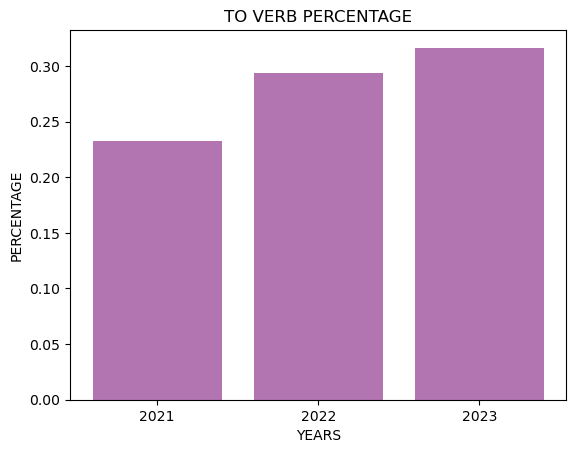

In [323]:
# import matplotlib.pyplot as plt

x=report_df['year']
y=report_df['to_do_perc']
bars=report_df['year']

plt.bar(x, y, color = (0.5,0.1,0.5,0.6))
 
# Add title and axis names
plt.title('TO VERB PERCENTAGE')
plt.xlabel('YEARS')
plt.ylabel('PERCENTAGE')
 
# Create names on the x axis
plt.xticks(x, bars)
 
# Show graph
plt.show()

In [327]:
report_df

,year,total_sent,to_do,to_do_perc
0,2021,271,63,0.232472
1,2022,245,72,0.293878
2,2023,490,155,0.316327


In [340]:
271-63

208

In [341]:
245 - 72

173

In [342]:
490 - 155

335

In [351]:

group_size2 = []
for i in report_df['total_sent']:
    group_size2 += [i]

In [352]:
group_size2

[271, 245, 490]

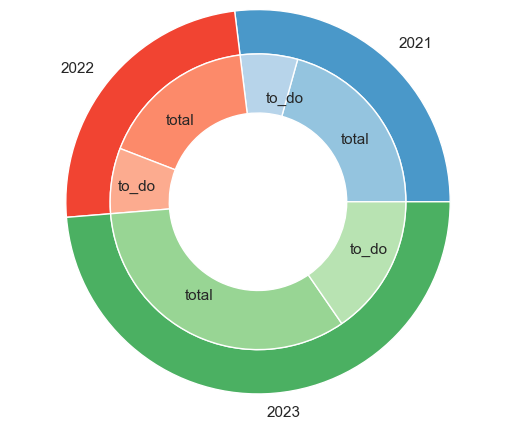

In [347]:
# Libraries
import matplotlib.pyplot as plt
 


#    names = ['2021', '2022', '2023']
#    size = [63, 72, 155]
#    group_names=['groupA', 'groupB', 'groupC']
#    group_size=[12,11,30]

group_names = ['2021', '2022', '2023']
group_size = [271, 245, 490]
subgroup_names=['total', 'to_do', 'total', 'to_do', 'total', 'to_do']
subgroup_size=[208, 63, 173, 72, 335, 155]
 
# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6), c(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.4), a(0.3), b(0.4), b(0.3), c(0.4), c(0.3)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
# show it
plt.show()

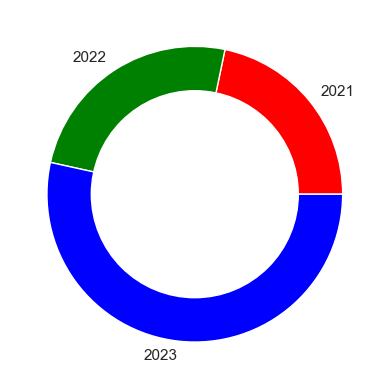

In [338]:
# library
import matplotlib.pyplot as plt
 
# create data
names = ['2021', '2022', '2023']
size = [63, 72, 155]
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(size, labels=names, colors=['red','green','blue'])
p = plt.gcf()
p.gca().add_artist(my_circle)

# Show the graph
plt.show()